In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from catboost import CatBoostClassifier
import sklearn.metrics as metrics
import random
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_recall_curve

In [2]:
df = pd.read_excel('train_first.xlsx')

In [3]:
test_df = pd.read_excel('test.xlsx')

In [4]:
df.head()

,well id,"depth, m",bk,GZ1,GZ2,GZ3,GZ4,GZ5,GZ7,DGK,NKTD,NKTM,NKTR,ALPS,lith,goal
0,12,3042.4630,0.455779,0.774000,0.774000,0.332846,0.476545,0.774000,0.244898,0.123651,0.774000,0.799167,0.174639,0.727789,NK,0
1,33,2412.8305,NaN,0.157153,0.755472,0.453216,0.715147,NaN,0.523432,0.388729,0.519233,0.799167,0.563573,0.111216,ARGILLIT,0
2,33,2522.5575,NaN,0.172235,0.941742,0.525711,0.668600,NaN,0.588924,0.515214,0.527139,0.799167,0.551152,0.172359,ARGILLIT,0
3,49,2396.3625,0.381248,0.246838,0.116913,0.732654,0.151299,0.165219,0.656955,0.445917,0.575175,0.799167,0.429433,0.253563,ARGILLIT,0
4,49,2399.0475,0.356867,0.226241,0.155473,0.613300,0.173949,0.297194,0.773218,0.392743,0.575725,0.799167,0.447169,0.959633,ARGILLIT,0


In [5]:
test_df.head()

,id,well id,"depth, m",bk,GZ1,GZ2,GZ3,GZ4,GZ5,GZ7,DGK,NKTD,NKTM,NKTR,ALPS
0,1,47,2465.5460,0.665198,0.259688,0.865866,0.526683,0.116218,0.464870,0.124486,0.196296,0.483192,0.643774,0.376472,0.261831
1,2,47,2465.6355,0.115153,0.258287,0.161988,0.583114,0.122256,0.477795,0.118895,0.146578,0.491132,0.655735,0.359872,0.236470
2,3,47,2465.7250,0.155254,0.318849,0.125817,0.639544,0.128194,0.497212,0.111693,0.968615,0.499726,0.667695,0.343272,0.266756
3,4,47,2465.8145,0.125315,0.474215,0.149127,0.638636,0.128239,0.478265,0.987464,0.546126,0.492469,0.659642,0.341159,0.332568
4,5,47,2465.9040,0.953756,0.638341,0.172437,0.637663,0.113455,0.465892,0.858188,0.123651,0.485865,0.651513,0.339456,0.398383


In [6]:
print(sorted(df['well id'].unique()))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 

In [7]:
print(len(df['well id'].unique()))
deltas = []
for id in tqdm_notebook(df['well id'].unique()):
    deltas.append(max(df[df['well id'] == id]['depth, m']) - min(df[df['well id'] == id]['depth, m']))

282


In [8]:
sorted(deltas)

[19.33199999999988,
 21.390499999999975,
 21.74850000000015,
 40.8119999999999,
 43.4074999999998,
 43.67599999999993,
 47.166499999999814,
 47.4350000000004,
 47.79300000000012,
 48.240499999999884,
 48.59850000000006,
 49.04599999999982,
 51.91000000000031,
 52.447000000000116,
 52.447000000000116,
 53.43149999999969,
 54.326500000000124,
 54.50550000000021,
 54.50550000000021,
 54.77400000000034,
 55.847999999999956,
 55.9375,
 58.17500000000018,
 58.44349999999986,
 59.06999999999971,
 60.86000000000013,
 62.91850000000022,
 63.45550000000003,
 65.60350000000017,
 76.97000000000025,
 81.44500000000016,
 81.98199999999997,
 85.02500000000009,
 85.47249999999985,
 86.99400000000014,
 87.62049999999999,
 88.06800000000021,
 89.67900000000009,
 91.91650000000027,
 92.27449999999999,
 92.27449999999999,
 92.99049999999988,
 93.70649999999978,
 94.86999999999989,
 95.22800000000007,
 95.22800000000007,
 95.58599999999979,
 96.12299999999959,
 96.39149999999972,
 97.01800000000003,
 97.64

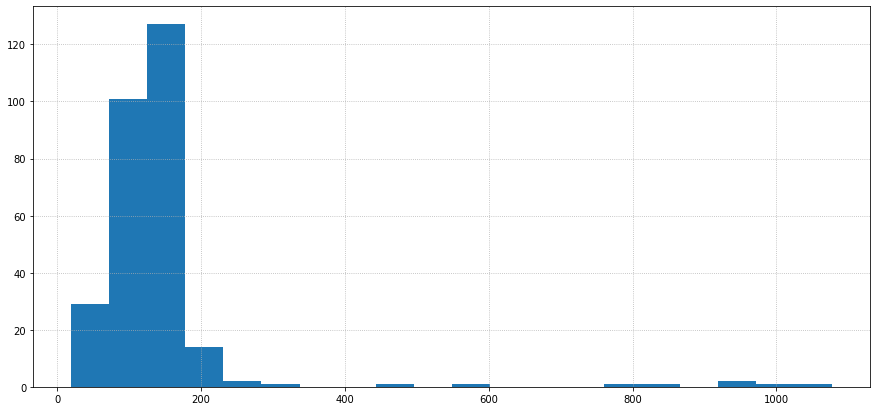

In [9]:
plt.figure(figsize=(15, 7))
plt.hist(deltas, bins=20)
plt.grid(ls=':')

In [10]:
for col in df.columns:
    print(col, df[col].isnull().values.any())

well id False
depth, m False
bk True
GZ1 True
GZ2 True
GZ3 True
GZ4 True
GZ5 True
GZ7 True
DGK True
NKTD True
NKTM True
NKTR True
ALPS True
lith False
goal False


In [11]:
deltas = []
for id in df['well id'].unique():
    depths = df[df['well id'] == id]['depth, m'].sort_values()
    for i in range(1, len(depths)):
        deltas.append(depths.iloc[i] - depths.iloc[i - 1])

In [12]:
np.mean(deltas)

0.08787395576070664

In [13]:
costs = {}
costs['bk'] = 2450
costs['GZ1'] = 2050
costs['GZ2'] = 2050
costs['GZ3'] = 2050
costs['GZ4'] = 2050
costs['GZ5'] = 2050
costs['GZ7'] = 2050
costs['DGK'] = 1300
costs['NKTD'] = 2050
costs['NKTM'] = 2050
costs['NKTR'] = 2050
costs['ALPS'] = 1150

In [14]:
np.unique(deltas)

array([ 0.    ,  0.0895,  0.0895,  0.0895,  0.0895,  0.2685,  0.358 ,
        0.358 ,  0.4475,  0.6265,  0.716 ,  0.8055,  0.895 ,  1.253 ,
        1.3425,  1.432 ,  2.327 ,  2.506 ,  2.5955,  3.759 ,  3.938 ,
        4.3855,  5.191 ,  5.6385,  6.981 ,  6.981 ,  8.3235,  8.6815,
        9.487 , 11.7245, 12.2615, 14.499 , 31.0565])

In [15]:
DELTA = 0.08950000000004366

In [16]:
df_no_null= df.copy()

In [18]:
corotages = ['bk', 'GZ1', 'GZ2', 'GZ3', 'GZ4', 'GZ5', 'GZ7', 'DGK', 'NKTD', 'NKTM', 'NKTR', 'ALPS']
df_no_null[corotages] = df_no_null[corotages].apply(lambda x: x.fillna(x.mean()), axis=0)
df_no_null

,well id,"depth, m",bk,GZ1,GZ2,GZ3,GZ4,GZ5,GZ7,DGK,NKTD,NKTM,NKTR,ALPS,lith,goal
0,12,3042.4630,0.455779,0.774000,0.774000,0.332846,0.476545,0.774000,0.244898,0.123651,0.774000,0.799167,0.174639,0.727789,NK,0
1,33,2412.8305,0.354064,0.157153,0.755472,0.453216,0.715147,0.301386,0.523432,0.388729,0.519233,0.799167,0.563573,0.111216,ARGILLIT,0
2,33,2522.5575,0.354064,0.172235,0.941742,0.525711,0.668600,0.301386,0.588924,0.515214,0.527139,0.799167,0.551152,0.172359,ARGILLIT,0
3,49,2396.3625,0.381248,0.246838,0.116913,0.732654,0.151299,0.165219,0.656955,0.445917,0.575175,0.799167,0.429433,0.253563,ARGILLIT,0
4,49,2399.0475,0.356867,0.226241,0.155473,0.613300,0.173949,0.297194,0.773218,0.392743,0.575725,0.799167,0.447169,0.959633,ARGILLIT,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463892,287,2217.3625,0.354064,0.213477,0.121747,0.510815,0.487103,0.301386,0.554748,0.418060,0.442153,0.533739,0.447622,0.712853,ARGILLIT,0
463893,287,2217.4520,0.354064,0.215987,0.122570,0.510815,0.487103,0.301386,0.554748,0.418060,0.444390,0.533739,0.447622,0.676591,ARGILLIT,0
463894,287,2217.5415,0.354064,0.215987,0.119374,0.510815,0.487103,0.301386,0.554748,0.418060,0.445926,0.533739,0.447622,0.718157,ARGILLIT,0
463895,287,2217.6310,0.354064,0.215987,0.118723,0.510815,0.487103,0.301386,0.554748,0.418060,0.447813,0.533739,0.447622,0.759722,ARGILLIT,0


In [19]:
df_processed = df_no_null.copy()
ids = df_processed['well id'].unique()
random.shuffle(ids)
cut = int(len(ids) * 0.67)
X_train_ids = ids[:cut]
X_test_ids = ids[cut:]

In [20]:
X_train_ids

array([216,  66, 235,  22, 156, 207, 114, 161, 225, 227,  62,  17, 201,
       254, 163, 220, 145, 149, 231, 249,  71, 238, 185, 174, 183,  40,
       194,  94, 127, 141, 151, 112, 240, 177, 105,  56,  15,  99,  67,
       166,  23,  50,   2, 273,  37, 130, 173, 155,  96,  24,  90, 268,
       271, 203, 270, 179, 200, 258, 189, 229, 233, 230, 283,  87, 236,
       278, 188,  92,  18, 204, 195,  58,  61, 262,  45, 250, 122, 144,
        97, 244,   3, 172, 138, 168, 146, 133, 239, 100, 285,  76, 276,
       131, 152, 214, 110,  75, 119, 223, 132, 150, 251, 182, 280, 253,
       116, 137, 279,  68,  16, 210,  26, 107, 232,  38, 135, 108,   6,
        85, 124, 217, 237, 198,  11, 118, 181,  81, 129, 265, 101,  79,
       102, 125,  57,  10,  14, 209,  83, 197,  63, 184, 143,  54, 169,
       153, 128, 142,  34, 205,  84, 196, 243, 266, 186,  89, 211,  53,
       165, 121, 162,  48,   1,  35, 261, 219,  78,   5, 175, 264, 257,
       158,  60, 218,  21, 215,  59, 170,   7, 117,  77, 277, 10

In [21]:
X_test_ids

array([ 72,  42,  32,  28, 272, 222, 212, 202, 255, 187,  25, 221,   9,
        55, 245,  41,  70, 206,  27, 136, 191, 246, 154,  43, 274, 281,
       192,  80,  91, 213,  39,  30,  13, 123,  29, 267, 260,  20,  36,
        86, 199, 287,  12,  65, 178,  64, 106, 193,  88, 109, 252,  49,
       234, 120,  51, 259,  33, 140, 275, 167,   8, 284, 242, 226, 180,
        93,  19, 224, 160, 115, 241, 228,  44,  52, 256, 248, 286,   4,
       147, 247, 157,  31, 208, 111, 148, 171,  98, 113,  82, 139, 190,
       134,  69,  74])

In [22]:
train = df_processed[df_processed['well id'].isin(X_train_ids)].copy()
test = df_processed[df_processed['well id'].isin(X_test_ids)].copy()

In [23]:
X_train = train.copy()
X_train.drop('lith', axis=1, inplace=True)
X_train.drop('goal', axis=1, inplace=True)
X_train.drop('well id', axis=1, inplace=True)
X_test = test.copy()
X_test.drop('lith', axis=1, inplace=True)
X_test.drop('goal', axis=1, inplace=True)
X_test.drop('well id', axis=1, inplace=True)
to_delete = ['GZ4', 'NKTR', 'GZ5', 'GZ7', 'DGK', 'GZ3', 'GZ2', 'NKTM', 'NKTD']
for item in to_delete:
    X_train.drop(item, axis=1, inplace=True)
    X_test.drop(item, axis=1, inplace=True)
y_train = train['goal'].copy()
y_test = test['goal'].copy()

In [24]:
model = CatBoostClassifier(iterations=500,
                          learning_rate=0.1,
                          depth=10, custom_metric='F1', random_seed=19)
model.fit(X_train, y_train)

0:	learn: 0.5701626	total: 151ms	remaining: 1m 15s
1:	learn: 0.4758107	total: 227ms	remaining: 56.6s
2:	learn: 0.4157149	total: 302ms	remaining: 50s
3:	learn: 0.3691917	total: 384ms	remaining: 47.6s
4:	learn: 0.3390926	total: 469ms	remaining: 46.4s
5:	learn: 0.3165215	total: 557ms	remaining: 45.9s
6:	learn: 0.3001031	total: 632ms	remaining: 44.5s
7:	learn: 0.2883552	total: 699ms	remaining: 43s
8:	learn: 0.2789523	total: 766ms	remaining: 41.8s
9:	learn: 0.2716181	total: 846ms	remaining: 41.4s
10:	learn: 0.2660012	total: 936ms	remaining: 41.6s
11:	learn: 0.2609593	total: 1.01s	remaining: 41.2s
12:	learn: 0.2568455	total: 1.09s	remaining: 41s
13:	learn: 0.2533005	total: 1.17s	remaining: 40.7s
14:	learn: 0.2503475	total: 1.25s	remaining: 40.4s
15:	learn: 0.2483049	total: 1.33s	remaining: 40.3s
16:	learn: 0.2466671	total: 1.41s	remaining: 40.1s
17:	learn: 0.2444496	total: 1.49s	remaining: 39.8s
18:	learn: 0.2423309	total: 1.55s	remaining: 39.3s
19:	learn: 0.2412253	total: 1.63s	remaining: 3

163:	learn: 0.1991609	total: 12s	remaining: 24.5s
164:	learn: 0.1990709	total: 12s	remaining: 24.4s
165:	learn: 0.1989831	total: 12.1s	remaining: 24.4s
166:	learn: 0.1988496	total: 12.2s	remaining: 24.3s
167:	learn: 0.1986046	total: 12.3s	remaining: 24.2s
168:	learn: 0.1984434	total: 12.3s	remaining: 24.1s
169:	learn: 0.1982638	total: 12.4s	remaining: 24.1s
170:	learn: 0.1981583	total: 12.5s	remaining: 24s
171:	learn: 0.1979578	total: 12.5s	remaining: 23.9s
172:	learn: 0.1978832	total: 12.6s	remaining: 23.8s
173:	learn: 0.1978071	total: 12.7s	remaining: 23.8s
174:	learn: 0.1976202	total: 12.8s	remaining: 23.7s
175:	learn: 0.1974968	total: 12.8s	remaining: 23.6s
176:	learn: 0.1973867	total: 12.9s	remaining: 23.6s
177:	learn: 0.1971845	total: 13s	remaining: 23.5s
178:	learn: 0.1970139	total: 13.1s	remaining: 23.4s
179:	learn: 0.1968491	total: 13.1s	remaining: 23.4s
180:	learn: 0.1967703	total: 13.2s	remaining: 23.3s
181:	learn: 0.1966515	total: 13.3s	remaining: 23.2s
182:	learn: 0.196570

322:	learn: 0.1835923	total: 23.5s	remaining: 12.9s
323:	learn: 0.1835326	total: 23.6s	remaining: 12.8s
324:	learn: 0.1834591	total: 23.6s	remaining: 12.7s
325:	learn: 0.1833884	total: 23.7s	remaining: 12.7s
326:	learn: 0.1833408	total: 23.8s	remaining: 12.6s
327:	learn: 0.1832921	total: 23.9s	remaining: 12.5s
328:	learn: 0.1832383	total: 23.9s	remaining: 12.4s
329:	learn: 0.1831665	total: 24s	remaining: 12.4s
330:	learn: 0.1831003	total: 24.1s	remaining: 12.3s
331:	learn: 0.1830076	total: 24.1s	remaining: 12.2s
332:	learn: 0.1828905	total: 24.2s	remaining: 12.1s
333:	learn: 0.1828080	total: 24.3s	remaining: 12.1s
334:	learn: 0.1827222	total: 24.4s	remaining: 12s
335:	learn: 0.1826654	total: 24.4s	remaining: 11.9s
336:	learn: 0.1826122	total: 24.5s	remaining: 11.9s
337:	learn: 0.1825209	total: 24.6s	remaining: 11.8s
338:	learn: 0.1824515	total: 24.7s	remaining: 11.7s
339:	learn: 0.1824099	total: 24.8s	remaining: 11.7s
340:	learn: 0.1823139	total: 24.8s	remaining: 11.6s
341:	learn: 0.18

481:	learn: 0.1741194	total: 35.6s	remaining: 1.33s
482:	learn: 0.1740864	total: 35.7s	remaining: 1.26s
483:	learn: 0.1740325	total: 35.8s	remaining: 1.18s
484:	learn: 0.1739729	total: 35.8s	remaining: 1.11s
485:	learn: 0.1739547	total: 35.9s	remaining: 1.03s
486:	learn: 0.1738785	total: 36s	remaining: 961ms
487:	learn: 0.1738338	total: 36.1s	remaining: 887ms
488:	learn: 0.1737593	total: 36.1s	remaining: 813ms
489:	learn: 0.1736958	total: 36.2s	remaining: 739ms
490:	learn: 0.1736451	total: 36.3s	remaining: 665ms
491:	learn: 0.1735928	total: 36.3s	remaining: 591ms
492:	learn: 0.1735369	total: 36.4s	remaining: 517ms
493:	learn: 0.1734981	total: 36.5s	remaining: 443ms
494:	learn: 0.1734715	total: 36.6s	remaining: 369ms
495:	learn: 0.1733984	total: 36.6s	remaining: 295ms
496:	learn: 0.1733697	total: 36.7s	remaining: 222ms
497:	learn: 0.1733024	total: 36.8s	remaining: 148ms
498:	learn: 0.1732291	total: 36.8s	remaining: 73.8ms
499:	learn: 0.1731638	total: 36.9s	remaining: 0us


In [25]:
preds = model.predict(X_test)

In [26]:
probs = model.predict_proba(X_test)

In [27]:
accuracy_score(y_test, preds)

0.8867442047202269

In [28]:
precision, recall, thresholds = precision_recall_curve(y_test, probs[:,1])
optimal_idx = 0
opt = 0
for i in range(len(precision)):
    if precision[i] == 0 and recall[i] == 0:
        continue
    if 2 * precision[i] * recall[i] / (precision[i] + recall[i]) > opt:
        opt = 2 * precision[i] * recall[i] / (precision[i] + recall[i])
        optimal_idx = i
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.2696785284940366

(0.0, 1.0)

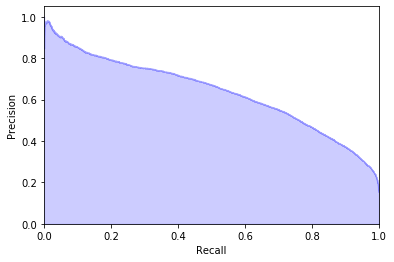

In [29]:
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

In [30]:
preds = np.copy(probs[:,1])
preds[preds < optimal_threshold] = 0
preds[preds >= optimal_threshold] = 1

In [31]:
precision = precision_score(y_test, preds)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, preds)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, preds)
print('F1 score: %f' % f1)

Precision: 0.555104
Recall: 0.694744
F1 score: 0.617123


In [32]:
total_money = 0
for item in corotages:
    if item not in to_delete:
        total_money += costs[item]
cnt = 0
cnt1 = 0
cnt2 = 0
for i in range(len(preds)):
    if preds[i] == 1 and y_test.iloc[i] == 1:
        cnt += 1
    if preds[i] == 0 and y_test.iloc[i] == 1:
        cnt1 += 1
    if preds[i] == 1 and y_test.iloc[i] == 0:
        cnt2 += 1
print(cnt)
print(cnt1)
print(cnt2)
print("Money earned: ", DELTA * cnt / (cnt + cnt1) * (cnt1 + cnt2) * 0.7 * 100 * 860 * 4150 - len(y_test) * total_money * DELTA)# - DELTA * cnt1 * 0.7 * 100 * 860 * 4150)

17090
7509
13697
Money earned:  329338911272.66284


In [33]:
results = pd.read_excel('result.xlsx')
results

,id,lith,goal
0,1,NaN,NaN
1,2,NaN,NaN
2,3,NaN,NaN
3,4,NaN,NaN
4,5,NaN,NaN
...,...,...,...
37599,37600,NaN,NaN
37600,37601,NaN,NaN
37601,37602,NaN,NaN
37602,37603,NaN,NaN


In [ ]:
def predict(features, id_, thrashhold=0.30224501355700123):
    df = pd.read_excel('train_first.xlsx')
    test_df = pd.read_excel('test.xlsx')

    costs = {}
    costs['bk'] = 2450
    costs['GZ1'] = 2050
    costs['GZ2'] = 2050
    costs['GZ3'] = 2050
    costs['GZ4'] = 2050
    costs['GZ5'] = 2050
    costs['GZ7'] = 2050
    costs['DGK'] = 1300
    costs['NKTD'] = 2050
    costs['NKTM'] = 2050
    costs['NKTR'] = 2050
    costs['ALPS'] = 1150

    corotages = ['bk', 'GZ1', 'GZ2', 'GZ3', 'GZ4', 'GZ5', 'GZ7', 'DGK', 'NKTD', 'NKTM', 'NKTR', 'ALPS']
    DELTA = 0.08950000000004366

    df_no_null = df.copy()
    df_no_null[corotages] = df_no_null[corotages].apply(lambda x: x.fillna(x.mean()), axis=0)
    train = df_no_null.copy()

    df_no_null = test_df.copy()
    df_no_null[corotages] = df_no_null[corotages].apply(lambda x: x.fillna(x.mean()), axis=0)
    test = df_no_null.copy()

    X_train = train.copy()
    X_train.drop('lith', axis=1, inplace=True)
    X_train.drop('goal', axis=1, inplace=True)
    X_train.drop('well id', axis=1, inplace=True)
    y_train = train['goal'].copy()
    y_lith_train = train['lith'].copy()
    
    X_test = test.copy()
    ids = test['id'].copy()
    X_test.drop('id', axis=1, inplace=True)

    for item in corotages:
        if item not in features:
            X_train.drop(item, axis=1, inplace=True)
            X_test.drop(item, axis=1, inplace=True)       

    model = CatBoostClassifier(iterations=500,
                              learning_rate=0.01,
                              depth=10, custom_metric='F1', random_seed=19)
    model.fit(X_train, y_train)
    
    model_lith = CatBoostClassifier(iterations=200,
                              learning_rate=0.01,
                              depth=10)
    model_lith.fit(X_train, y_lith_train)
    lith_preds = model_lith.predict(X_test)

    probs = model.predict_proba(X_test)

    preds = np.copy(probs[:,1])
    preds[preds < optimal_threshold] = 0
    preds[preds >= optimal_threshold] = 1
    
    test['goal'] = preds
    test['lith'] = lith_preds
    
    res = {}
    for i in range(len(preds)):
        res[ids[i]] = preds[i]

    res_lith = {}
    for i in range(len(lith_preds)):
        res_lith[ids[i]] = lith_preds[i]

    results = pd.read_excel('result.xlsx')

    for i in range(len(results)):
        cur_id = results.iloc[i]['id']
        results.loc[i, 'goal'] = res[cur_id]
        results.loc[i, 'lith'] = res_lith[cur_id]

    results.to_csv('submission.csv')
    test.to_csv('final.csv')
    return

predict(['bk', 'GZ1', 'NKTD', 'ALPS'], 1)

0:	learn: 0.6785867	total: 148ms	remaining: 1m 13s
1:	learn: 0.6648227	total: 248ms	remaining: 1m 1s
2:	learn: 0.6508490	total: 350ms	remaining: 58s
3:	learn: 0.6378766	total: 454ms	remaining: 56.3s
4:	learn: 0.6253852	total: 550ms	remaining: 54.4s
5:	learn: 0.6125780	total: 656ms	remaining: 54s
6:	learn: 0.6002463	total: 748ms	remaining: 52.7s
7:	learn: 0.5888079	total: 843ms	remaining: 51.8s
8:	learn: 0.5774935	total: 940ms	remaining: 51.3s
9:	learn: 0.5661948	total: 1.03s	remaining: 50.6s
10:	learn: 0.5556951	total: 1.13s	remaining: 50s
11:	learn: 0.5458276	total: 1.23s	remaining: 50s
12:	learn: 0.5357051	total: 1.32s	remaining: 49.5s
13:	learn: 0.5263040	total: 1.41s	remaining: 49s
14:	learn: 0.5168444	total: 1.51s	remaining: 48.9s
15:	learn: 0.5076270	total: 1.61s	remaining: 48.6s
16:	learn: 0.4992260	total: 1.7s	remaining: 48.4s
17:	learn: 0.4914416	total: 1.8s	remaining: 48.3s
18:	learn: 0.4838494	total: 1.9s	remaining: 48s
19:	learn: 0.4764417	total: 1.99s	remaining: 47.7s
20:	

163:	learn: 0.2460009	total: 17.2s	remaining: 35.3s
164:	learn: 0.2457521	total: 17.3s	remaining: 35.2s
165:	learn: 0.2455507	total: 17.4s	remaining: 35.1s
166:	learn: 0.2453346	total: 17.6s	remaining: 35s
167:	learn: 0.2451211	total: 17.7s	remaining: 34.9s
168:	learn: 0.2449626	total: 17.8s	remaining: 34.8s
169:	learn: 0.2447493	total: 17.9s	remaining: 34.7s
170:	learn: 0.2445237	total: 18s	remaining: 34.6s
171:	learn: 0.2443508	total: 18.1s	remaining: 34.5s
172:	learn: 0.2441774	total: 18.2s	remaining: 34.4s
173:	learn: 0.2439931	total: 18.3s	remaining: 34.3s
174:	learn: 0.2437894	total: 18.4s	remaining: 34.2s
175:	learn: 0.2435909	total: 18.6s	remaining: 34.2s
176:	learn: 0.2434144	total: 18.7s	remaining: 34s
177:	learn: 0.2432657	total: 18.8s	remaining: 34s
178:	learn: 0.2430218	total: 18.9s	remaining: 33.9s
179:	learn: 0.2428367	total: 19s	remaining: 33.7s
180:	learn: 0.2426131	total: 19.1s	remaining: 33.6s
181:	learn: 0.2424051	total: 19.2s	remaining: 33.5s
182:	learn: 0.2421863	

322:	learn: 0.2275606	total: 35s	remaining: 19.2s
323:	learn: 0.2274937	total: 35.1s	remaining: 19.1s
324:	learn: 0.2274466	total: 35.2s	remaining: 19s
325:	learn: 0.2273950	total: 35.4s	remaining: 18.9s
326:	learn: 0.2273282	total: 35.5s	remaining: 18.8s
327:	learn: 0.2272653	total: 35.6s	remaining: 18.6s
328:	learn: 0.2271995	total: 35.7s	remaining: 18.5s
329:	learn: 0.2271250	total: 35.8s	remaining: 18.4s
330:	learn: 0.2270687	total: 35.9s	remaining: 18.3s
331:	learn: 0.2270066	total: 36s	remaining: 18.2s
332:	learn: 0.2269407	total: 36.1s	remaining: 18.1s
333:	learn: 0.2268612	total: 36.2s	remaining: 18s
334:	learn: 0.2267980	total: 36.3s	remaining: 17.9s
335:	learn: 0.2267419	total: 36.4s	remaining: 17.8s
336:	learn: 0.2266888	total: 36.5s	remaining: 17.6s
337:	learn: 0.2266122	total: 36.6s	remaining: 17.5s
338:	learn: 0.2265344	total: 36.7s	remaining: 17.4s
339:	learn: 0.2264779	total: 36.8s	remaining: 17.3s
340:	learn: 0.2263993	total: 36.9s	remaining: 17.2s
341:	learn: 0.226341

481:	learn: 0.2192536	total: 52.3s	remaining: 1.95s
482:	learn: 0.2192159	total: 52.4s	remaining: 1.84s
483:	learn: 0.2191707	total: 52.5s	remaining: 1.74s
484:	learn: 0.2191262	total: 52.6s	remaining: 1.63s
485:	learn: 0.2190878	total: 52.7s	remaining: 1.52s
486:	learn: 0.2190342	total: 52.8s	remaining: 1.41s
487:	learn: 0.2190058	total: 52.9s	remaining: 1.3s
488:	learn: 0.2189559	total: 53s	remaining: 1.19s
489:	learn: 0.2188925	total: 53.1s	remaining: 1.08s
490:	learn: 0.2188539	total: 53.2s	remaining: 976ms
491:	learn: 0.2188202	total: 53.3s	remaining: 867ms
492:	learn: 0.2187765	total: 53.4s	remaining: 759ms
493:	learn: 0.2187237	total: 53.5s	remaining: 650ms
494:	learn: 0.2186722	total: 53.6s	remaining: 542ms
495:	learn: 0.2186433	total: 53.7s	remaining: 433ms
496:	learn: 0.2186122	total: 53.9s	remaining: 325ms
497:	learn: 0.2185802	total: 54s	remaining: 217ms
498:	learn: 0.2185462	total: 54.1s	remaining: 108ms
499:	learn: 0.2185027	total: 54.2s	remaining: 0us
0:	learn: 2.4207998